## Understand Problem
### Task
As a consultant, you are asked to determine which residence’s cluster is chosen by customers based on several clusters that you specify according to your creativity. 

We want to predict regency_cluster of each buyer.

### Importing and Accessing

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv(r'D:\Praktikum, Self Project, Tubes, Competition, Webinar\Self Project - Kaggle Project or Data Analytics Competition\DAC PRS ITS\DAC-20210713T045045Z-001\DAC\Train.csv', parse_dates=['time_date', 'dealing_date', 'buying_date'])
test_df = pd.read_csv(r'D:\Praktikum, Self Project, Tubes, Competition, Webinar\Self Project - Kaggle Project or Data Analytics Competition\DAC PRS ITS\DAC-20210713T045045Z-001\DAC\Test.csv', parse_dates=['time_date', 'dealing_date', 'buying_date'])
sample_sub = pd.read_csv(r'D:\Praktikum, Self Project, Tubes, Competition, Webinar\Self Project - Kaggle Project or Data Analytics Competition\DAC PRS ITS\DAC-20210713T045045Z-001\DAC\Sample Submission DAC.csv')

## Exploratory Data Analysis
### Variable Identification

**Type of Variabel**

Potential Predictor Variable:
- buyer_city = Identifier Variable (4521 uniqueness)
- regency_market = Identifier Variable (
- destination_type = (8 uniqueness)

- K Modes Algorithm
 
Target variables:
- regency_cluster


**Variabel Category**

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5506131/

Categorical: 

Continuos: 
- distance

Discrete:
- adults
- children
- room

Categorical:
- adult
- children

Setelah sekilas melihat data dan melihat task yang diberikan di question sheet, 1 variable test_df diatas dan 1 variable train_df diatas kuputuskan untuk dihapus aja

In [4]:
train_df = train_df.drop(columns=['Unnamed: 0'])
test_df = test_df.drop(columns=['Unnamed: 0'])

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   time_date          343583 non-null  datetime64[ns]
 1   site               343583 non-null  int64         
 2   continent_id       343583 non-null  int64         
 3   buyer_country      343583 non-null  int64         
 4   buyer_region       343583 non-null  int64         
 5   buyer_city         343583 non-null  int64         
 6   distance           145685 non-null  float64       
 7   buyer_id           343583 non-null  int64         
 8   mobile             343583 non-null  int64         
 9   package            343583 non-null  int64         
 10  channel_id         343583 non-null  int64         
 11  buying_date        342885 non-null  datetime64[ns]
 12  dealing_date       342885 non-null  datetime64[ns]
 13  adults             343583 non-null  int64   

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21018 non-null  int64         
 1   time_date          21018 non-null  datetime64[ns]
 2   site               21018 non-null  int64         
 3   continent_id       21018 non-null  int64         
 4   buyer_country      21018 non-null  int64         
 5   buyer_region       21018 non-null  int64         
 6   buyer_city         21018 non-null  int64         
 7   distance           11167 non-null  float64       
 8   buyer_id           21018 non-null  int64         
 9   mobile             21018 non-null  int64         
 10  package            21018 non-null  int64         
 11  channel_id         21018 non-null  int64         
 12  buying_date        21018 non-null  datetime64[ns]
 13  dealing_date       21018 non-null  datetime64[ns]
 14  adults

Kalau kamu lihat diatas, ada 2 missing variable di test_df, dealing dan cnt. Oleh karena 2 variable ini tidak ada di test_df, 

- opsi pertama adalah mendrop 2 variable ini dari train_df. Ya karena variabel ini tidak digunakan di test_df untuk memperkirakan regency_cluster yang dipilih masing-masing buyer_id.

### Univariate Analysis
#### Numerical Variables (Continuous) 
Hanya terdapat satu continuous variable sejauh yang kulihat, yaitu distance. Kolom distance ini memiliki persentase null values 57%. Treeshold umum yang sering dipakai para praktisi data biasanya berkisar pada 25%-30%. Padahal ini merupakan salah satu variabel yang cukup penting. Apakah variabel ini didrop saja?.

In [7]:
#berapa persen missing value dari variable distance
train_df['distance'].isna().sum()/train_df.shape[0]*100

57.59830957876263

C:\Users\db_user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distance'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distance Histogram')]

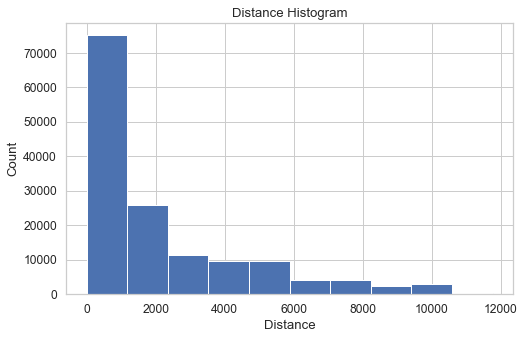

In [8]:
#histogram dari variable distance
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train_df['distance'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='Distance', ylabel='Count', title="Distance Histogram")

#### Numerical Variables (Discrete) 
Ada tiga variabel yang tergolong variable diskrit
- room
- adults
- children

Klik link ini untuk mendukung argumen mu terhadap tiga variabel ini 

https://blog.minitab.com/en/understanding-statistics/understanding-qualitative-quantitative-attribute-discrete-and-continuous-data-types

In [9]:
def get_discrete_univariate_analysis(input_df, column):
    print('-------------'+column.upper()+'  DISTRIBUTION-----------------')
    rolled_up_df = input_df.groupby(column).size().reset_index(name='count').sort_values(['count'], ascending=False)
    count = rolled_up_df['count'].sum()
    rolled_up_df['perc'] = round((rolled_up_df['count'] / count) * 100, 2)
    rolled_up_df.index = range(1,len(rolled_up_df)+1)
    print(rolled_up_df)
    print('-------------------------------------------------------------')

def get_discrete_countplot(input_df, column):
    plt.subplots(figsize=(10,5))
    sns.countplot(train_df[column])
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title(column +' Barplot')

In [10]:
dis_col = ['room', 'adults','children']
for dis in dis_col:
    get_discrete_univariate_analysis(train_df, dis)

-------------ROOM  DISTRIBUTION-----------------
   room   count   perc
1     1  314286  91.47
2     2   22370   6.51
3     3    4350   1.27
4     4    1126   0.33
5     5     595   0.17
6     8     461   0.13
7     6     262   0.08
8     7     132   0.04
9     0       1   0.00
-------------------------------------------------------------
-------------ADULTS  DISTRIBUTION-----------------
    adults   count   perc
1        2  213327  62.09
2        1   88624  25.79
3        3   18629   5.42
4        4   15643   4.55
5        5    2839   0.83
6        6    2613   0.76
7        8     830   0.24
8        0     485   0.14
9        7     441   0.13
10       9     152   0.04
-------------------------------------------------------------
-------------CHILDREN  DISTRIBUTION-----------------
   children   count   perc
1         0  276871  80.58
2         1   40895  11.90
3         2   21699   6.32
4         3    3024   0.88
5         4     883   0.26
6         5     111   0.03
7         6      9

Itu kalau dilihat, mayoritas memilih regency dengan total kamar (room) sebanyak 1 aja, dengan kapasitas adults sebanyak 2. Sehingga masuk akal kalau misalnya children yang dipilih masih nol, jadi kita beranggapan mayoritas yang mencari rumah ini adalah pasangan yang baru nikah

C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


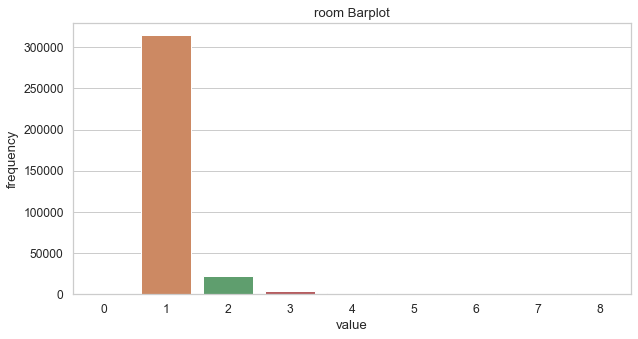

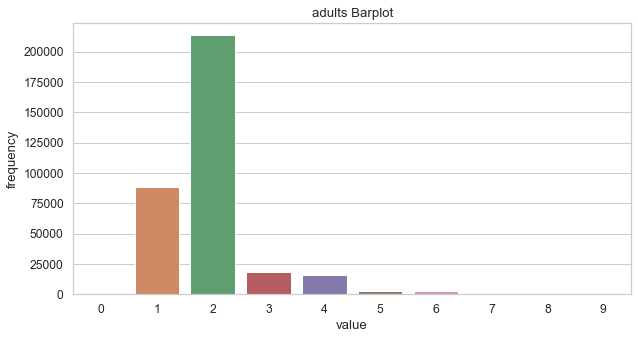

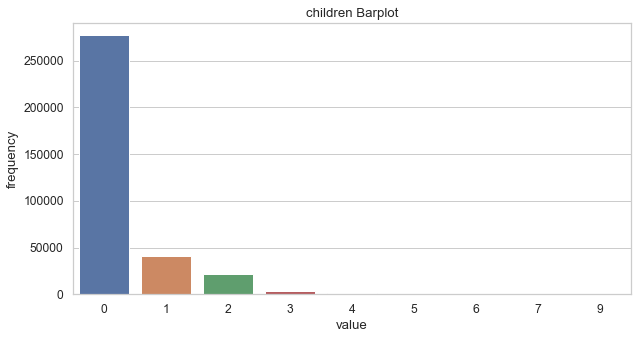

In [11]:
for dis in dis_col:
    get_discrete_countplot(train_df, dis)

#### Categorical Variables (Identifier)

Some of your data have id variabel (buyer_id, destination_id, etc). This id variables we set as categorical data. This is the source you can use as preferences.

- https://www.statisticshowto.com/identifier-variables-2/#:~:text=Identifier%20variables%20are%20categorical%20variables,Employee%20ID%20number.

In [67]:
pd.options.display.max_rows = 10
cat_col = train_df.drop(columns=['time_date', 'buying_date', 'dealing_date', 'adults','children','room', 'distance', 'mobile', 'package', 'regency_cluster'], axis=1)
def get_categorical_countplot(input_df, column):
    plt.subplots(2, 3, figsize=(10,5))
    sns.countplot(train_df[column])
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title(column +' Barplot')

for cat in cat_col:
    get_discrete_univariate_analysis(train_df, cat)

-------------SITE  DISTRIBUTION-----------------
    site   count   perc
1      2  117070  34.07
2     24  110851  32.26
3     37   16744   4.87
4     23   15969   4.65
5      8   15963   4.65
..   ...     ...    ...
26     6      64   0.02
27    47      39   0.01
28    46      22   0.01
29    19       2   0.00
30    16       2   0.00

[30 rows x 3 columns]
-------------------------------------------------------------
-------------CONTINENT_ID  DISTRIBUTION-----------------
   continent_id   count   perc
1             3  136545  39.74
2             2  126637  36.86
3             1   58539  17.04
4             4   19110   5.56
5             0    2752   0.80
-------------------------------------------------------------
-------------BUYER_COUNTRY  DISTRIBUTION-----------------
     buyer_country   count   perc
1               66  104621  30.45
2                3  102033  29.70
3              205   18698   5.44
4               69   15659   4.56
5                1   15582   4.54
..         

Ini ending nya bakalan lama sekali komputasi nya karena ada beberapa variable yang id nya hingga ribuan bahkan puluh ribuan. Jadi tipe variable ini tidak bisa di countplot kan

**Check Uniqueness**

In [13]:
#Check uniqueness column we want to know
pd.options.display.max_rows = 10
col_check = list(cat_col.columns.values.tolist())

def printing_uniqueness(input_df, column):
    print('-------------'+column.upper()+'  UNIQUENESS-----------------')
    print("\nUnique Values\n", sorted(input_df[column].unique()), "\nTotal", len(input_df[column].unique()))
    print("\nNull Values\n", input_df[column].isnull().sum())
    print("\n")
    
for col in col_check:
    printing_uniqueness(train_df, col)

-------------SITE  UNIQUENESS-----------------

Unique Values
 [2, 6, 7, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 46, 47, 48] 
Total 30

Null Values
 0


-------------CONTINENT_ID  UNIQUENESS-----------------

Unique Values
 [0, 1, 2, 3, 4] 
Total 5

Null Values
 0


-------------BUYER_COUNTRY  UNIQUENESS-----------------

Unique Values
 [0, 1, 3, 4, 5, 6, 10, 11, 12, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 39, 42, 43, 44, 45, 46, 47, 48, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 80, 82, 83, 85, 87, 90, 91, 92, 93, 95, 98, 99, 101, 103, 104, 105, 106, 109, 112, 114, 115, 116, 117, 119, 122, 123, 125, 126, 127, 129, 130, 131, 133, 134, 137, 141, 142, 144, 146, 148, 149, 150, 153, 154, 155, 156, 158, 162, 163, 166, 167, 168, 172, 173, 175, 176, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 194, 195, 198, 200, 202, 205, 206, 208, 209, 21

In [14]:
#coba cari tahu dari masing-masing buyer_id, berapa kali mereka dealing = 1
train_df.groupby(['buyer_id']).sum().tail(20)

,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
buyer_id,,,,,,,,,,,,,,,,,,,,
9980,192,16,24,408,76216,0.0000,0,5,16,12,1,8,127017,8,0,8,24,1033,1863,609
9981,252,17,225,1238,109679,0.0000,0,0,46,18,0,10,143976,35,1,12,39,1086,2503,204
9982,69,3,3,1031,33446,297.5688,0,0,3,9,0,3,60627,18,1,4,18,315,66,297
9983,868,63,560,3754,955603,0.0000,0,3,176,58,26,35,584131,99,1,61,168,3640,14467,1709
9984,336,28,42,700,79842,0.0000,0,0,84,16,0,14,515056,69,0,16,84,2016,182,649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1572,130,409,4288,480409,0.0000,56,14,251,137,4,67,1148366,277,0,89,197,8138,17316,4081
9996,75,5,275,1865,127555,0.0000,0,0,0,10,0,5,49970,15,0,5,30,385,1110,100
9997,5934,478,1622,14195,3332067,0.0000,155,20,1507,526,57,249,4175670,1046,7,369,732,42978,19518,11506


Berarti untuk kolom package, bisa saja buyer_id memiliki package value 1 walau dealing nya 0 karena seperti yang terlihat dideskripsi variable, 1 if the click/buying was generated as a part of a package (bisa click bisa buying)

Walau dealing value nya 0, dealing date nya tetap terisi, kenapa ya?

Kalau melihat dari data ini saja, masing-masing buyer_id mempunyai preferensi regency_cluster yang sangat banyak sekali. Yang mana yang bener-bener dipilih masing-masing buyer_id?. Dari sample submission nya sih, hanya 1 yang bisa dipilih untuk masing-masing regency_cluster bagi masing-masing buyer_id

In [66]:
#aku mau coba ambil sample buyer_id ke 13 yang melakukan dealing 7 kali
pd.options.display.max_columns = 35
cek = train_df.drop(columns=['timestamp_year_month', 'timestamp_day_name', 'timestamp_hours', 'dealing_day_name', 'dealing_year_month', 'buying_day_name', 'buying_year_month'])
cek.loc[(train_df['buyer_id'] == 13)&(cek['dealing'] == 1)]

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
140014,2014-07-09 12:04:00,2,3,34,53,5056,NaN,13,0,1,9,2014-07-22,2014-07-28,1,0,1,11816,1,1,1,6,77,1482,64
140022,2014-07-14 09:36:00,2,3,34,53,5056,NaN,13,0,0,9,2014-07-22,2014-07-25,2,0,1,11816,1,1,1,6,77,1482,64
140069,2014-08-23 04:16:00,2,3,55,23,47551,NaN,13,0,0,9,2014-08-23,2014-08-28,2,0,1,8255,1,1,1,6,77,20,5
140166,2014-10-13 23:30:00,2,3,55,23,47551,NaN,13,0,0,9,2014-10-14,2014-10-16,2,0,1,8255,1,1,1,6,77,20,29
140193,2014-10-16 02:11:00,2,3,55,23,47551,NaN,13,0,0,9,2014-10-16,2014-10-17,2,0,1,8255,1,1,1,6,77,20,29
140198,2014-10-16 17:06:00,2,3,55,23,47551,NaN,13,0,0,9,2014-10-17,2014-10-21,2,0,1,8255,1,1,1,6,77,20,46
140209,2014-12-27 14:07:00,2,3,34,68,29060,NaN,13,0,0,9,2015-01-15,2015-01-19,1,0,1,12643,5,1,1,6,77,20,46


Dia dealing 7 kali dan regency_cluster yang dipilih berbeda-beda (regency_cluster 64, 5, 29, dan 46). Tapi sample-submission untuk dikumpul nanti itu (sesuai yang dikasih) berdasarkan buyer_id yang masing-masing hanya boleh pilih 1 regency_cluster. Kenapa bisa begini?. Apakah ada redundant time-stamp?. Apakah kesalahan sistem informasi mereka?.

Ataukah mungkin pertanyaan nya mereka kurang tepat. Maksudku kalau begini caranya gak bisa deteksi berdasarkan masing-masing buyer_id. Berarti berdasarkan masing-masing behaviour id test_df. Barti gini ending nya, setelah hasil prediksi masing-masing id test_df didapat, nah group by kan lah berdasarkan buyer_id untuk analisis penjelasan masing-masing buyer_id itu preferensi regency_cluster nya apa aja (bisa lebih dari satu)

Untuk 2 variabel yang tidak ada di test dataset yang ada di train dataset(variable dan cnt), remove that features from train dataset. Untuk source yang mendukug keputusan ini, klik link ini https://stats.stackexchange.com/questions/388014/training-data-has-more-variables-than-test-data 

*Analyze buyer_city variable apakah jika buyer_city ber id tertentu, buyer_country dan buyer_region nya bernilai sama*

In [61]:
location = ['buyer_id', 'continent_id', 'buyer_country', 'buyer_region', 'buyer_city', 'distance', 'regency_continent', 'regency_country', 'regency_market', 'regency_cluster', 'dealing', 'destination_type', 'room', 'package']
location_df = train_df[location] 

In [62]:
location_df.loc[(location_df.buyer_city == 40365)].head(20)

,buyer_id,continent_id,buyer_country,buyer_region,buyer_city,distance,regency_continent,regency_country,regency_market,regency_cluster,dealing,destination_type,room,package
120,1713,3,66,174,40365,5463.5637,2,0,87,6,0,5,2,0
121,1713,3,66,174,40365,8456.8294,1,3,5,38,0,3,2,0
122,1713,3,66,174,40365,8454.4977,1,3,5,46,0,3,2,0
123,1713,3,66,174,40365,8454.2620,4,3,5,67,0,3,2,0
124,1713,3,66,174,40365,8455.6211,1,3,5,81,0,3,1,0
125,1713,3,66,174,40365,8457.2636,2,3,5,82,0,3,1,0
126,1713,3,66,174,40365,8456.8294,3,3,5,38,0,3,2,0
127,1713,3,66,174,40365,8457.0606,1,3,5,53,0,3,1,0
128,1713,3,66,174,40365,8456.8294,1,3,5,38,1,3,2,0
155845,6599,1,44,29,40365,NaN,1,4,8,84,0,1,1,1


dari sisi regency, hanya regency_market lah yang menurut intuisi ku mempengaruhi nilai distance.

distance itu ditentukan oleh regency_market dan buyer_city. 

In [63]:
location_df.loc[(location_df['buyer_city'] == 48862) &  (location_df['distance'] == 329.3728)]

,buyer_id,continent_id,buyer_country,buyer_region,buyer_city,distance,regency_continent,regency_country,regency_market,regency_cluster,dealing,destination_type,room,package
900,6304,3,66,348,48862,329.3728,1,2,198,28,0,1,1,0
901,6304,3,66,348,48862,329.3728,1,2,198,28,0,1,1,0


In [64]:
location_df.loc[(location_df['buyer_city'] == 6514)]

,buyer_id,continent_id,buyer_country,buyer_region,buyer_city,distance,regency_continent,regency_country,regency_market,regency_cluster,dealing,destination_type,room,package
42984,5390,4,77,977,6514,5514.1070,1,2,50,0,0,1,1,1
81092,5493,1,69,648,6514,NaN,1,6,77,61,0,1,1,1
81093,5493,1,69,648,6514,NaN,1,6,77,82,0,1,1,1
81094,5493,1,69,648,6514,NaN,3,6,77,36,0,1,1,1
81095,5493,1,69,648,6514,NaN,7,6,77,30,0,1,1,1
104538,3086,4,77,977,6514,5049.5730,1,3,106,28,0,4,1,0
104539,3086,4,77,977,6514,5049.9827,1,3,106,68,0,4,1,0
104540,3086,4,77,977,6514,5049.6658,1,3,106,9,0,4,1,0
104541,3086,4,77,977,6514,5050.2460,1,3,106,16,0,4,1,0
104542,3086,4,77,977,6514,5049.6439,1,3,106,99,0,4,1,0


Terdapat konsistensi antara buyer_country, buyer_region, dan buyer_city. Maka dari sini kita boleh menggunakan buyer_city saja untuk merepresentasikan buyer_region dan buyer_country nya.

Ternyata tidak setelah ngecek buyer_city = 6514

#### Categorical Variables (Yes/No)

In [27]:
bol_col = ['mobile','package']
for bol in bol_col:
    get_discrete_univariate_analysis(train_df, bol)

-------------MOBILE  DISTRIBUTION-----------------
   mobile   count   perc
1       0  305618  88.95
2       1   37965  11.05
-------------------------------------------------------------
-------------PACKAGE  DISTRIBUTION-----------------
   package   count   perc
1        0  266689  77.62
2        1   76894  22.38
-------------------------------------------------------------


C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\db_user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


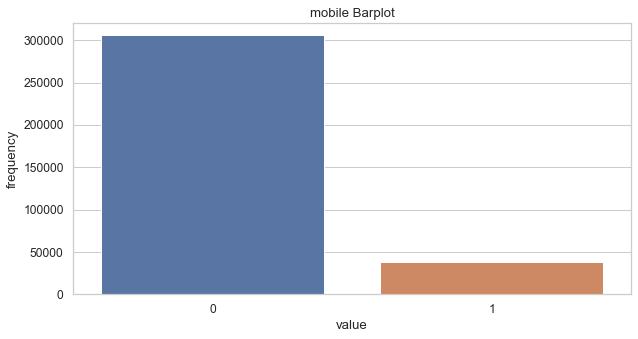

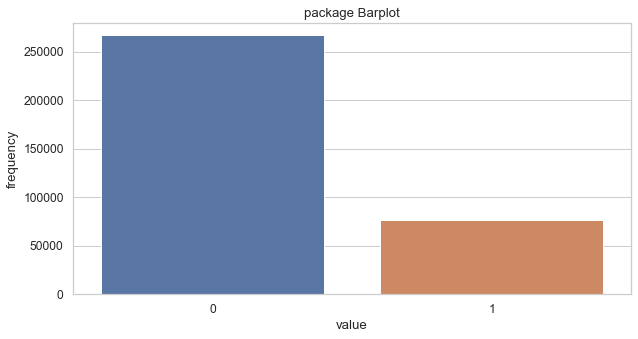

In [28]:
for bol in bol_col:
    get_discrete_countplot(train_df, bol)

#### Target Variables
Let we visualize regency_cluster 

#set figure size
plt.figure(figsize=(30,20))

#plotting
sns.countplot(
    x='regency_cluster', data=train_df)
plt.title('Barplot Regency Cluster')
plt.show()

#### Time Series Variables
Let we visualize each time series

Coba buat variabel baru untuk masing-masing dealing_date, buying_date, dan time_date ke year, month, day, hour. Terus coba visualisasi kan berdasarkan variable baru tersebut

In [29]:
train_df['timestamp_year_month'] = train_df['time_date'].dt.strftime('%Y-%m')
train_df['timestamp_day_name'] = train_df['time_date'].dt.day_name()
train_df['timestamp_hours'] = train_df['time_date'].dt.hour

train_df['dealing_year_month'] = train_df['dealing_date'].dt.strftime('%Y-%m')
train_df['dealing_day_name'] = train_df['dealing_date'].dt.day_name()

train_df['buying_year_month'] = train_df['buying_date'].dt.strftime('%Y-%m')
train_df['buying_day_name'] = train_df['buying_date'].dt.day_name()

In [30]:
train_df.tail()

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,...,regency_market,cnt,regency_cluster,timestamp_year_month,timestamp_day_name,timestamp_hours,dealing_year_month,dealing_day_name,buying_year_month,buying_day_name
343578,2014-01-27 19:21:00,37,1,69,648,6514,NaN,9672,1,1,...,50,744,94,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343579,2014-01-27 19:27:00,37,1,69,648,6514,NaN,9672,1,1,...,50,412,70,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343580,2014-01-27 19:38:00,37,1,69,648,6514,NaN,9672,1,1,...,50,406,18,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343581,2014-01-27 19:45:00,37,1,69,648,6514,NaN,9672,1,1,...,50,723,91,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343582,2014-04-28 23:32:00,37,1,69,828,34329,NaN,9672,1,0,...,50,409,95,2014-04,Monday,23,2014-09,Sunday,2014-08,Sunday


### Question to ask and answer
1. Bagaimana distribusi pergerakan aktifitas buyer di apps setiap minggu?

In [31]:
sns.set(style='darkgrid')

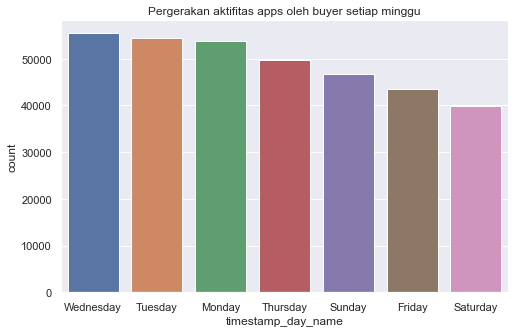

In [32]:
sns.countplot(x = 'timestamp_day_name',
              data = train_df,
              order = train_df['timestamp_day_name'].value_counts().index)
plt.title('Pergerakan aktifitas apps oleh buyer setiap minggu')
plt.show()

2. Dalam sehari, aktifitas buyer pada apps terjadi pada jam berapa aja?

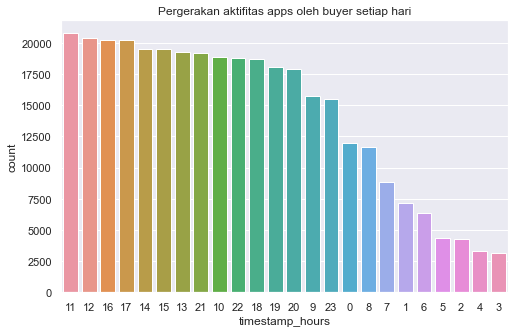

In [35]:
sns.countplot(x = 'timestamp_hours',
              data = train_df,
              order = train_df['timestamp_hours'].value_counts().index)
plt.title('Pergerakan aktifitas apps oleh buyer setiap hari')
plt.show()

- Opsi 1: Dari sini dapat di lihat bahwa mayoritas buyer melakukan aktifitas nya di appsnya dari jam 9 pagi hingga relatif jam 11 malam. (kalau diambil batas jam 9, berarti rentang aktifitas buyer mulai berjalan intens itu dari jam 10 pagi sampai jam 10 malam). Dari sini bisa kasih suggestion ke agent untuk selalu siap sedia pada rentang jam ini, terkhusus dimulai dari jam 10. Jika agent siap sedia, pelayanan ke buyer akan maksimal karena perhatian user ekstra dimulai pada jam tersebut
- Opsi 2: Karena pergerakan bandwith aplikasi mulai intens dari jam 10, diperkuat server nya mulai dari jam segini hingga jam 10 malam. Disini kita beranggapan bahwa regency agents sebagai operator apps nya.

3. Mayoritas aktifitas buying terjadi pada hari apa?

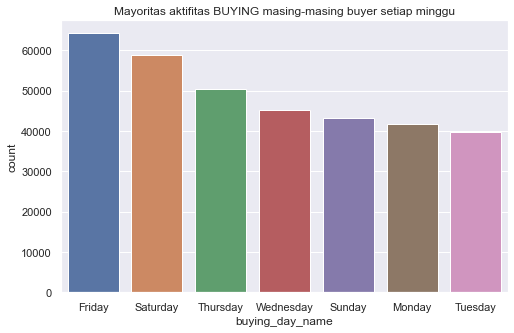

In [36]:
sns.countplot(x = 'buying_day_name',
              data = train_df,
              order = train_df['buying_day_name'].value_counts().index)
plt.title('Mayoritas aktifitas BUYING masing-masing buyer setiap minggu')
plt.show()

4. Mayoritas aktifitas dealing terjadi pada hari apa?

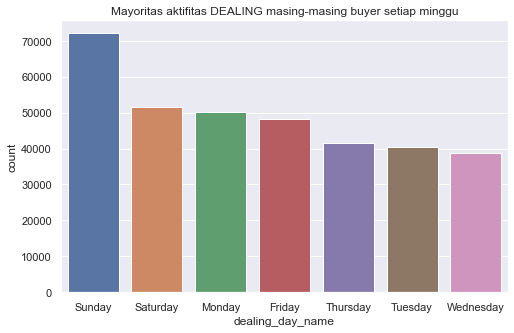

In [37]:
sns.countplot(x = 'dealing_day_name',
              data = train_df,
              order = train_df['dealing_day_name'].value_counts().index)
plt.title('Mayoritas aktifitas DEALING masing-masing buyer setiap minggu')
plt.show()

5. Bagaimana pergerakan aktifitas aplikasi setiap bulannya dalam setiap tahun?

In [38]:
date_index = train_df['timestamp_year_month'].unique()
date_index = np.sort(date_index, axis=0)
date_index.tolist()

['2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12']

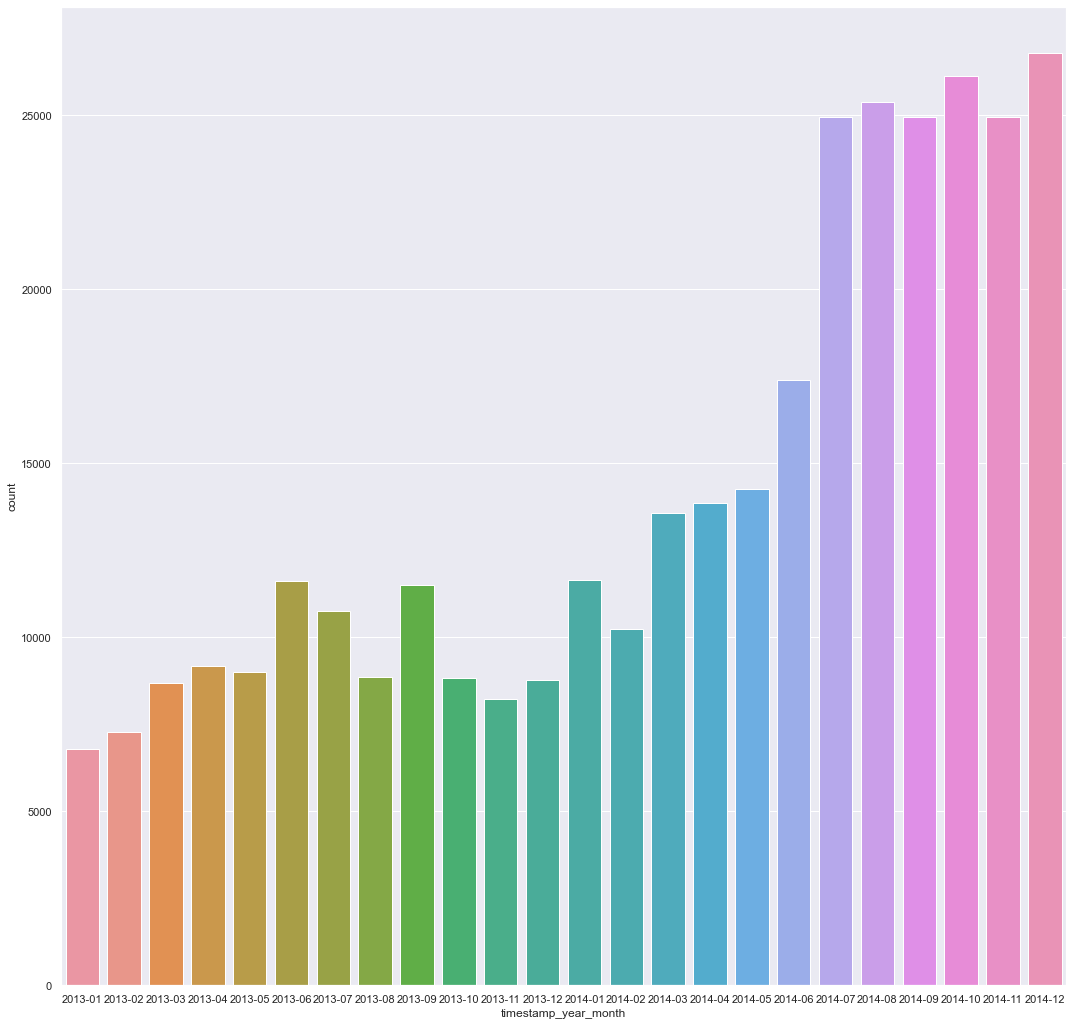

In [39]:
#set figure size
plt.figure(figsize=(18,18))

#plotting
sns.countplot(
    x='timestamp_year_month', data=train_df, order=date_index)
plt.show()

Semakin tahun, permintaan akan perumahan semakin meningkat. Dari grafik tersebut membuktikan pendapat dari ...

6. Untuk mengukur performa kinerja bisnis, bagaimana pergerakan pembelian setiap bulannya dalam setiap tahun?

7. Bagaimana pergerakan dealing setiap bulannya dalam setiap tahun?

### Bi-variate Analysis
#### Continuous & Continuous

Correlation


In [40]:
#Correlation map to see how features are correlated with SalePrice
#corrmat = train_df.corr()
#plt.subplots(figsize=(12,9))
#sns.heatmap(corrmat, vmax=0.9, square=True)

#Because majority of data variables is categorical, we can't use this correlation for further analysis

Dari sini terlihat bahwa tidak ada korelasi antar masing-masing variabel dengan variabel lainnya. Hal ini karena nilai numerical yang dari masing-masing variabel mayoritas adalah ID, bukan real value. Barti coba cari yang mana merupakan value yang bukan merupakan ID. Coba check question sheet nya. 

Aku pikir bisa rely on distance. Ini real numerical value, bukan sebatas id.
Merujuk pada deskripsi variable di soal, distance ini sudah mewakili buyer_country + buyer_region + buyer_city dan regency_continent + regency_country + regency_market. Dideskripsi soal distance dinyatakan sebagai "Physical distance between a regency and a customer at the time of search. A null means the distance could not be calculated"

Berarti variabel ini bisa diabaikan dulu untuk modelling:
- buyer_country
- buyer_region
- buyer_city
- regency_continent
- regency_country
- regency_market

Pay more attention aja dulu ke variabel inti berikut:
- Variabel Target = regency_cluster
- buyer_id

#### Categorical & Categorical

#### Categorical & Continuous

### Missing Value Treatment
Ada satu variable yang menurut kita sangat mempengaruhi regency_cluster, yang memiliki missing value yang sangat banyak. Sebelum itu mari print persentase missing value masing-masing variable

In [43]:
pd.options.display.max_rows = 30
train_df_na = (train_df.isnull().sum() / len(train_df)) * 100
train_df_na = train_df_na.drop(train_df_na[train_df_na == 0].index)
missing_data = pd.DataFrame({'Missing Percentage' :train_df_na, 'Total': train_df.isnull().sum()})


In [47]:
pd.options.display.max_rows = 40
missing_data.head(32)

,Missing Percentage,Total
adults,NaN,0
buyer_city,NaN,0
buyer_country,NaN,0
buyer_id,NaN,0
buyer_region,NaN,0
buying_date,0.203153,698
buying_day_name,0.203153,698
buying_year_month,0.203153,698
channel_id,NaN,0
children,NaN,0


##### 1. Dealing Date and Buying Date

coba kita lihat dahulu isi data yang memiliki nilai dealing_date dan buying_date sama dengan null.

In [48]:
pd.options.display.max_columns = 30
filtered_df = train_df[train_df['dealing_date'].isnull()]
filtered_df = filtered_df.drop(columns=['timestamp_year_month', 'timestamp_day_name', 'timestamp_hours', 'dealing_day_name', 'dealing_year_month', 'buying_day_name', 'buying_year_month'])
filtered_df_1 = train_df[train_df['buying_date'].isnull()]
filtered_df_1 = filtered_df_1.drop(columns=['timestamp_year_month', 'timestamp_day_name', 'timestamp_hours', 'dealing_day_name', 'dealing_year_month', 'buying_day_name', 'buying_year_month'])

In [49]:
filtered_df

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
1671,2013-06-10 18:56:00,2,3,66,226,9427,1809.9688,7783,0,1,2,NaT,NaT,2,0,1,9171,1,0,1,4,118,200,66
2474,2014-12-19 19:14:00,24,2,3,50,5703,NaN,1365,1,0,2,NaT,NaT,2,1,1,8242,1,0,2,3,171,61,37
2819,2013-04-04 14:05:00,24,2,3,38,46556,NaN,2099,0,0,9,NaT,NaT,2,0,1,8818,1,0,1,3,99,88,82
2822,2013-04-09 16:07:00,24,2,3,38,46556,NaN,2099,0,0,9,NaT,NaT,2,0,1,8818,1,0,1,3,99,88,82
3009,2013-10-09 21:45:00,24,2,3,50,5703,NaN,3953,0,0,1,NaT,NaT,2,0,1,8822,1,0,1,3,130,91,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336745,2013-05-15 11:47:00,2,3,66,467,36345,72.5636,7776,1,0,9,NaT,NaT,2,0,1,27396,6,0,1,2,50,538,9
336746,2013-05-15 11:47:00,2,3,66,467,36345,74.1174,7776,1,0,9,NaT,NaT,2,0,1,27396,6,0,2,2,50,538,25
339674,2013-09-06 23:02:00,2,3,66,174,43471,8669.2639,1488,1,0,1,NaT,NaT,2,0,1,20116,6,0,2,3,5,1701,26
339675,2013-10-07 23:11:00,2,3,66,174,24103,2452.4882,1488,1,0,1,NaT,NaT,2,0,1,12233,6,0,1,2,50,675,69


In [68]:
train_df

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster,timestamp_year_month,timestamp_day_name,timestamp_hours,dealing_year_month,dealing_day_name,buying_year_month,buying_day_name
0,2014-08-11 07:46:00,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1,2014-08,Monday,7,2014-08,Sunday,2014-08,Wednesday
1,2014-08-11 08:22:00,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1,2014-08,Monday,8,2014-09,Tuesday,2014-08,Friday
2,2014-08-11 08:24:00,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1,2014-08,Monday,8,2014-09,Tuesday,2014-08,Friday
3,2014-08-09 18:05:00,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80,2014-08,Saturday,18,2014-11,Friday,2014-11,Sunday
4,2014-08-09 18:08:00,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21,2014-08,Saturday,18,2014-11,Friday,2014-11,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343578,2014-01-27 19:21:00,37,1,69,648,6514,NaN,9672,1,1,9,2014-08-30,2014-09-01,4,0,2,172,1,0,1,2,50,744,94,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343579,2014-01-27 19:27:00,37,1,69,648,6514,NaN,9672,1,1,9,2014-08-30,2014-09-01,4,0,2,8277,1,0,1,2,50,412,70,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343580,2014-01-27 19:38:00,37,1,69,648,6514,NaN,9672,1,1,9,2014-08-30,2014-09-01,4,0,2,32726,4,0,1,2,50,406,18,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday
343581,2014-01-27 19:45:00,37,1,69,648,6514,NaN,9672,1,1,9,2014-08-30,2014-09-01,4,0,2,12010,1,0,1,2,50,723,91,2014-01,Monday,19,2014-09,Monday,2014-08,Saturday


Dari hasil diatas dapat kita lihat setiap baris yang memiliki null value di variable buying_date, maka otomatis merupakan null value di dealing_date. Null value ini mengindikasikan bahwa buyer hanya melakukan kunjungan pembelian tanpa mengakhiri nya dengan transaksi pembelian.

Apa yang harus ku lakukan dengan ke 698 missing value ini?. Coba kamu hapus semua yang row yang tidak ada buying_date dan dealing_date, apakah index total buyer_id nya masih = 10000?

#buat variabel baru
train_df_new = train_df.copy()
train_df_new = train_df.drop(columns=['timestamp_year_month', 'timestamp_day_name', 'timestamp_hours', 'dealing_day_name', 'dealing_year_month', 'buying_day_name', 'buying_year_month'])

Ternyata setelah didrop semua null values dari kolom dealing_date dan buying_date, tidak ada perubahan jumlah index buyer masih aman sejumlah 10000 (mengingat tujuan akhir projek ini adalah memprediksi behaviour setiap buyer_id, bagaimana mungkin kita bisa memprediksi perilaku buyer_id nya kalau data behaviour buyer_id nya tidak ada

##### 2. Distance
Pertama coba buat dulu dataframe baru yang hanya mengandung unsur buyer_location dan regency_location

pd.options.display.max_rows = 1000
location = ['time_date', 'buying_date', 'dealing_date','buyer_id',  'site', 'continent_id', 'buyer_country', 'buyer_region', 'buyer_city','room', 'adults', 'children', 'distance', 'regency_continent', 'regency_country', 'regency_market', 'destination_id', 'destination_type', 'channel_id', 'regency_cluster', 'package', 'dealing', 'cnt']
location_df = train_df_new[location] 
#ku hapus row dari kolom distance yang memiliki null value, karena kita kan disini mau mencoba mengira-ngira rumus yang tepat untuk distance ini apa agar menghasilkan angka seperti tertera dibawah
location_df = location_df.dropna(subset=['distance'])

location_df.loc[(location_df['buyer_id'] == 1)].head(25)

Dengan value variabel yang sama aja, distance nya tetap berbeda-beda. Mengapa distance nya bisa begitu?. Bahkan yang lebih parahnya lagi, dalam hari yang sama baik saat buying dan dealing, dia milih banyak sekali jenis regency_cluster, kok bisa gitu?

Apa jangan-jangan regency_cluster ini harus di grouping lagi value nya?

Adalah sulit sekali jika target variable nya categorical dengan 100 unique values yang harus diprediksi. Sejauh yang kutau tidak ada algoritma yang mampu menyokong ini


- jadi untuk distance nyesuain dengan gps 
- 

Kita mau coba cek bagaimana relasinya antara masing-masing variable dengan variable lainnya

In [ ]:
df_for_cor = train_df_new.drop(columns=['dealing_date', 'buying_date', 'time_date'], axis=1)

In [ ]:
df_for_cor = df_for_cor.corr()
sns.heatmap(df_for_cor)

Dari sini terlihat bahwa regency_cluster tidak memiliki relasi dengan variable apapun, sehingga kita beranggapan bahwa data regency_cluster ini tidak tepat sejak pengumpulan data dari lapangan.

Tapi sebenarnya kita gak bisa melakukan correlation jika variabel tersebut hanya merupakan identifier. Tidak ada argumen kuat masih yang mendukung ini.

Sekarang kita mau prediksi isi dari masing-masing distance. Karena nanti kita membutuhkan variabel distance ini untuk membuat clustering untuk pilihan regency masing-masing buyer_id

In [ ]:
train_df_new.head()

distance itu dipengaruhi oleh:
- continent_id
- buyer_country
- buyer_region
- buyer_city
- regency_continent
- regency_country
- regency_market

*Count distance missing values groupby buyer_id for combine dataframe*

In [52]:
combine = pd.concat([train_df, test_df])

In [53]:
combine.shape

(364601, 32)

In [54]:
location = ['buyer_id', 'continent_id', 'buyer_country', 'buyer_region', 'buyer_city', 'distance', 'regency_continent', 'regency_country', 'regency_market']
location_df = combine[location] 

In [55]:
location_df = location_df.groupby(['buyer_id']).mean()

In [56]:
location_df.head(1000)

,continent_id,buyer_country,buyer_region,buyer_city,distance,regency_continent,regency_country,regency_market
buyer_id,,,,,,,,
0,3.000000,66.000000,174.000000,26166.500000,191.657488,1.375000,14.000000,237.375000
1,3.000000,66.000000,174.000000,37449.000000,5505.759433,2.666667,70.666667,326.500000
2,3.000000,66.000000,311.000000,25671.000000,NaN,1.550000,4.400000,78.150000
3,3.000000,66.000000,434.555556,10810.777778,286.045944,1.111111,7.333333,116.222222
4,3.000000,66.000000,258.000000,34401.909091,1301.452673,1.454545,8.181818,47.181818
...,...,...,...,...,...,...,...,...
995,3.000000,85.280000,576.880000,24094.120000,5971.407478,1.360000,9.960000,135.400000
996,3.000000,66.000000,234.000000,15165.250000,643.487550,1.750000,15.500000,257.750000
997,2.000000,228.016129,77.532258,39239.290323,NaN,1.451613,10.500000,214.209677


In [ ]:
#persentase nilai null dari distance terhadap buyer_id
location_df.distance.isnull().sum()

*Count distance missing values groupby buyer_id for train dataframe*

In [57]:
location = ['buyer_id', 'continent_id', 'buyer_country', 'buyer_region', 'buyer_city', 'distance', 'regency_continent', 'regency_country', 'regency_market']
location_df = train_df[location] 

In [58]:
location_df = location_df.groupby(['buyer_id']).mean()

In [59]:
location_df

,continent_id,buyer_country,buyer_region,buyer_city,distance,regency_continent,regency_country,regency_market
buyer_id,,,,,,,,
0,3.000000,66.000000,174.000000,31373.666667,252.590767,1.166667,2.000000,50.000000
1,3.000000,66.000000,174.000000,37449.000000,5405.551900,1.000000,4.000000,98.000000
2,3.000000,66.000000,311.000000,25671.000000,NaN,1.526316,2.000000,50.000000
3,3.000000,66.000000,448.750000,11024.500000,303.683400,1.000000,2.000000,50.000000
4,3.000000,66.000000,258.000000,33287.600000,1012.948390,1.000000,2.000000,50.000000
...,...,...,...,...,...,...,...,...
9995,1.940299,6.104478,64.000000,7170.283582,NaN,1.328358,2.940299,121.462687
9996,1.000000,55.000000,373.000000,25511.000000,NaN,1.000000,6.000000,77.000000
9997,1.943089,6.593496,57.703252,13544.987805,NaN,1.500000,2.975610,174.707317


In [ ]:
#persentase nilai null dari distance terhadap buyer_id
location_df.distance.isnull().sum()

Bagaimana caranya memprediksi nilai dari distance?
Apakah menggunakan supervised learning?

### Outlier Treatment
Because the majority of variables i'll use is categorical variables, so there is such thing as outlier treatment. This preference can prove why categorical outliers "literally" don't exist. https://medium.com/owl-analytics/categorical-outliers-dont-exist-8f4e82070cb2

## Feature Engineering
### Variable Transformation
Majority of our data is categorical variables. So for now we don't have to transform any variable

### Variable/Feature Creation
From my intuition, we may create new feature splitting date_time.

1. Customer Ratings: Jumlah terbanyak yang milih regency_cluster tipe tertentu, ekstrak dari regency_cluster dan dealing. Coba buat grafik antara regency_cluster dan dealing
2. Price: 